# IBM_PAYMENT_HISTORY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
plt.style.use('seaborn-whitegrid')

In [4]:
#reading data
df_receivable = pd.read_csv('WA_Fn-UseC_-Accounts-Receivable.csv')


In [5]:
df_receivable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [6]:
df_receivable.columns

Index(['countryCode', 'customerID', 'PaperlessDate', 'invoiceNumber',
       'InvoiceDate', 'DueDate', 'InvoiceAmount', 'Disputed', 'SettledDate',
       'PaperlessBill', 'DaysToSettle', 'DaysLate'],
      dtype='object')

In [7]:
df_receivable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [8]:
df_receivable.InvoiceDate = pd.to_datetime(df_receivable.InvoiceDate)

In [9]:
df_receivable.head

<bound method NDFrame.head of       countryCode  customerID PaperlessDate  invoiceNumber InvoiceDate  \
0             391  0379-NEVHP      4/6/2013         611365  2013-01-02   
1             406  8976-AMJEO      3/3/2012        7900770  2013-01-26   
2             391  2820-XGXSB     1/26/2012        9231909  2013-07-03   
3             406  9322-YCTQO      4/6/2012        9888306  2013-02-10   
4             818  6627-ELFBK    11/26/2012       15752855  2012-10-25   
...           ...         ...           ...            ...         ...   
2461          391  6708-DPYTF      8/2/2012     9982796720  2013-10-18   
2462          391  9841-XLGBV      1/3/2013     9983237240  2012-09-19   
2463          770  7856-ODQFO      8/5/2012     9986249860  2012-07-02   
2464          770  7050-KQLDO     9/29/2012     9989225541  2012-04-27   
2465          406  9758-AIEIK     4/23/2012     9990243864  2013-07-04   

         DueDate  InvoiceAmount Disputed SettledDate PaperlessBill  \
0       2/1

In [10]:
df_receivable['Late'] = df_receivable['DaysLate'].apply(lambda x: 1 if x>0 else 0)

In [11]:
df_receivable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1


In [12]:
df_receivable.Late.value_counts()

0    1589
1     877
Name: Late, dtype: int64

In [13]:
df_receivable.InvoiceAmount.shift()

0          NaN
1        55.94
2        61.74
3        65.88
4       105.92
         ...  
2461     59.00
2462     79.61
2463     38.25
2464     67.59
2465     53.16
Name: InvoiceAmount, Length: 2466, dtype: float64

In [14]:
df_receivable['CountLate'] = df_receivable.groupby('customerID')['Late'].apply(lambda x: x.eq(1).cumsum().shift().fillna(0)).astype(int)


In [15]:
df_receivable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,CountLate
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0


In [16]:
df_receivable.CountLate.value_counts()

0     656
1     393
2     247
4     158
3     154
5     146
6      93
7      76
8      73
9      63
10     55
11     52
12     49
13     48
14     40
15     29
16     26
18     21
17     20
19     17
20     12
21     10
22      8
23      5
24      5
25      3
26      1
27      1
28      1
29      1
30      1
31      1
32      1
Name: CountLate, dtype: int64

In [17]:
df_receivable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   object        
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   object        
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   object        
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
 12  Late           2466 non-null   int64         
 13  CountLate      2466 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(6)
memory u

In [18]:
df_receivable.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate,Late,CountLate
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000,2466.000000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417,0.355637,4.410787
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607,0.478803,5.363647
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000,0.000000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000,0.000000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000,0.000000,2.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000,1.000000,7.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000,1.000000,32.000000


In [19]:
df_receivable.countryCode.unique()

array([391, 406, 818, 897, 770], dtype=int64)

<AxesSubplot:xlabel='countryCode', ylabel='DaysLate'>

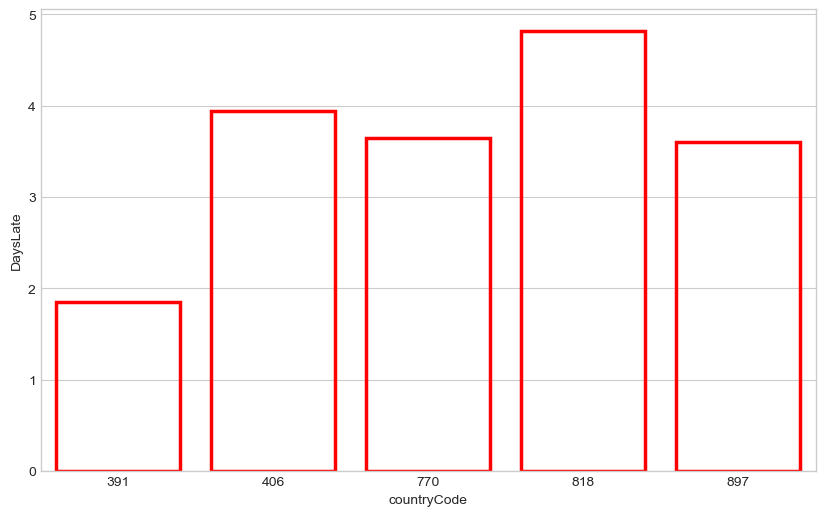

In [20]:
temp = pd.DataFrame(df_receivable.groupby(['countryCode'], axis=0, as_index=False)['DaysLate'].mean())
plt.figure(figsize=(10, 6))
sns.barplot(x='countryCode', y='DaysLate', data=temp, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor='black', edgecolor='red')

In [21]:
df_receivable.describe(include=np.object)

C:\Users\NASIM'S PC\AppData\Local\Temp\ipykernel_6016\1060603809.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_receivable.describe(include=np.object)


,customerID,PaperlessDate,DueDate,Disputed,SettledDate,PaperlessBill
count,2466,2466,2466,2466,2466,2466
unique,100,91,681,2,695,2
top,9149-MATVB,3/3/2012,1/29/2013,No,4/28/2013,Paper
freq,36,58,10,1905,10,1263


In [22]:
df_receivable.PaperlessBill.value_counts()

Paper         1263
Electronic    1203
Name: PaperlessBill, dtype: int64

In [23]:
customer_late = pd.crosstab(index=df_receivable['customerID'],columns=df_receivable['Late'])
customer_late.sort_values(by=[1],ascending=False)

Late,0,1
customerID,,
0688-XNJRO,2,32
8102-ABPKQ,1,26
8690-EEBEO,5,26
6708-DPYTF,5,25
4460-ZXNDN,3,25
...,...,...
6177-VTITE,21,0
6296-UKEUZ,19,0
6632-CGYHU,20,0


In [24]:
df1 = df_receivable[df_receivable['DaysLate']>0].copy()


In [25]:
df1

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,CountLate
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0
8,770,3831-FXWYK,3/8/2013,28049695,2012-05-14,6/13/2012,80.07,Yes,7/1/2012,Paper,48,18,1,0
12,818,5924-UOPGH,6/6/2013,36620839,2013-05-08,6/7/2013,90.08,Yes,6/9/2013,Paper,32,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,897,3676-CQAIF,7/29/2013,9938923133,2012-01-15,2/14/2012,48.06,No,2/22/2012,Paper,38,8,1,14
2456,818,8102-ABPKQ,8/29/2013,9941572096,2012-11-18,12/18/2012,74.16,Yes,1/2/2013,Paper,45,15,1,25
2457,818,5924-UOPGH,6/6/2013,9947321662,2012-09-08,10/8/2012,93.09,Yes,10/15/2012,Paper,37,7,1,5
2460,818,5148-SYKLB,8/28/2013,9982124268,2012-09-21,10/21/2012,59.00,Yes,10/28/2012,Paper,37,7,1,12


In [26]:
df2 = pd.DataFrame(df1.groupby(['customerID'],axis=0,as_index=False)['DaysLate'].count())


In [27]:
df2

,customerID,DaysLate
0,0379-NEVHP,1
1,0465-DTULQ,14
2,0625-TNJFG,5
3,0688-XNJRO,32
4,0706-NRGUP,10
...,...,...
78,9725-EZTEJ,13
79,9758-AIEIK,4
80,9841-XLGBV,2
81,9883-SDWFS,23


In [28]:
df2.columns=(['customerID','repeatCust'])

In [29]:
df2

,customerID,repeatCust
0,0379-NEVHP,1
1,0465-DTULQ,14
2,0625-TNJFG,5
3,0688-XNJRO,32
4,0706-NRGUP,10
...,...,...
78,9725-EZTEJ,13
79,9758-AIEIK,4
80,9841-XLGBV,2
81,9883-SDWFS,23


In [30]:
df3 = pd.merge(df_receivable,df2,how='left',on='customerID')

In [31]:
df3

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,CountLate,repeatCust
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0,1.0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0,5.0
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0,NaN
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0,17.0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,8/2/2012,9982796720,2013-10-18,11/17/2013,79.61,No,12/1/2013,Electronic,44,14,1,24,25.0
2462,391,9841-XLGBV,1/3/2013,9983237240,2012-09-19,10/19/2012,38.25,No,10/13/2012,Paper,24,0,0,2,2.0
2463,770,7856-ODQFO,8/5/2012,9986249860,2012-07-02,8/1/2012,67.59,No,7/27/2012,Paper,25,0,0,7,7.0
2464,770,7050-KQLDO,9/29/2012,9989225541,2012-04-27,5/27/2012,53.16,No,5/18/2012,Paper,21,0,0,5,5.0


In [32]:
df3['repeatCust'].fillna(0,inplace=True)

In [33]:
df3.shape


(2466, 15)

In [34]:
df_recievable= df3

In [52]:
df_receivable['Disputed'] = df_receivable['Disputed'].map({'No':0,'Yes':1})
df_receivable['PaperlessBill'] = df_receivable.PaperlessBill.map({'Paper':0,'Electronic':1})


In [53]:
df_receivable['InvoiceQuarter'] = pd.to_datetime(df_receivable['InvoiceDate']).dt.quarter


In [54]:
df_receivable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,CountLate,InvoiceQuarter
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,0,1/15/2013,0,13,0,0,0,1
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,1,3/3/2013,1,36,6,1,0,1
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,0,7/8/2013,1,5,0,0,0,3
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,0,3/17/2013,1,35,5,1,0,1
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,1,11/28/2012,0,34,4,1,0,4


In [55]:
##check relation with late feature


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


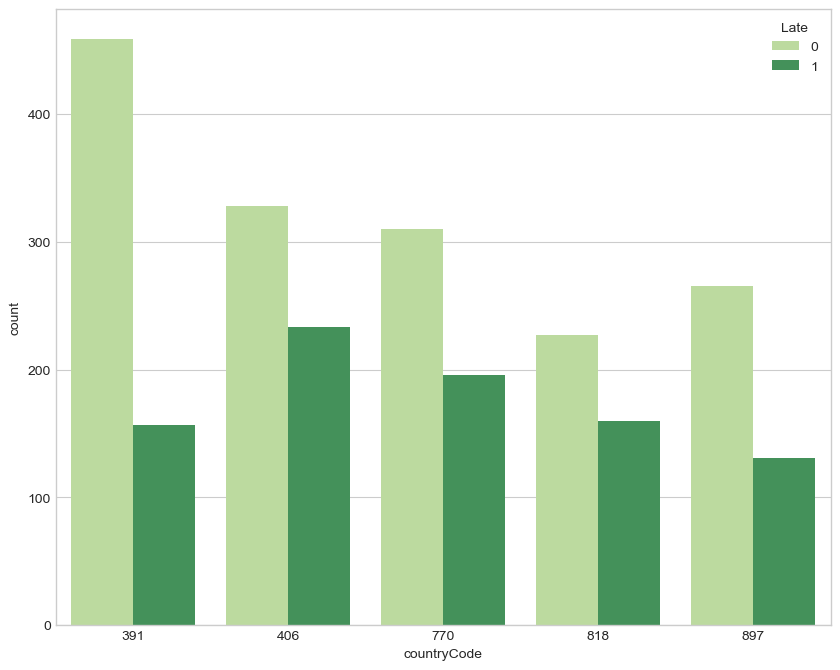

In [57]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df_receivable['countryCode'],hue=df_receivable['Late'],palette='YlGn')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


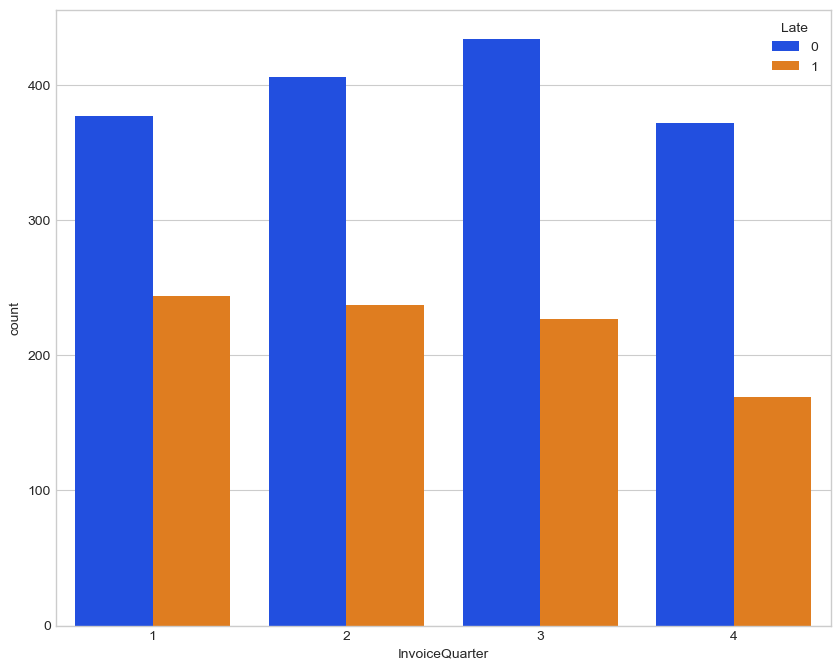

In [58]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df_receivable['InvoiceQuarter'],hue=df_receivable['Late'],palette='bright')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


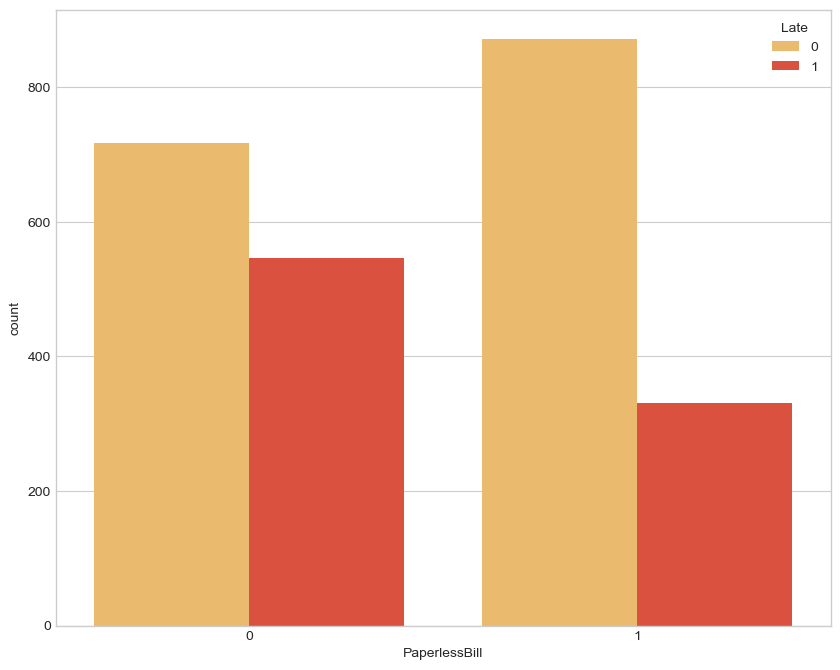

In [60]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df_receivable['PaperlessBill'],hue=df_receivable['Late'],palette='YlOrRd')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


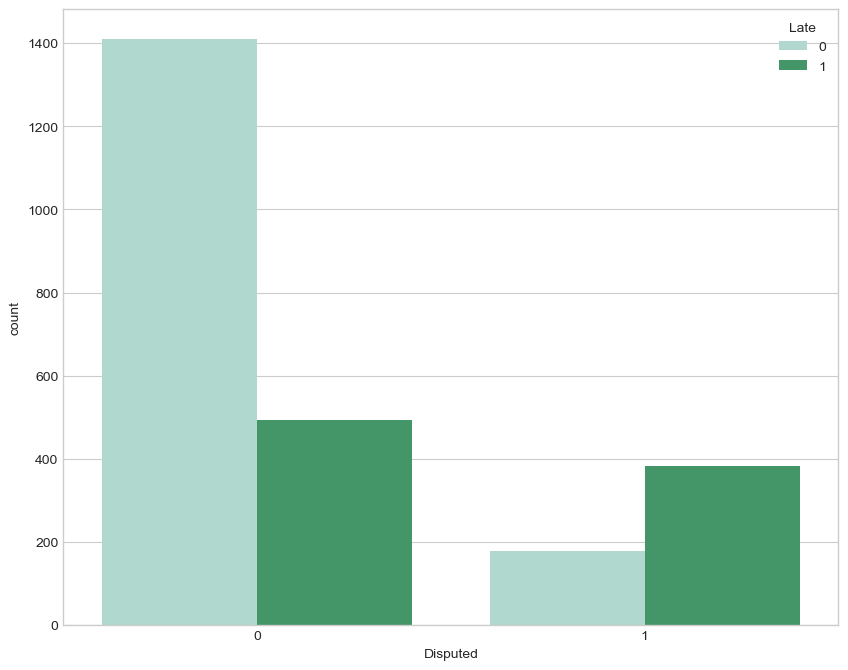

In [62]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df_receivable['Disputed'],hue=df_receivable['Late'],palette='BuGn')

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

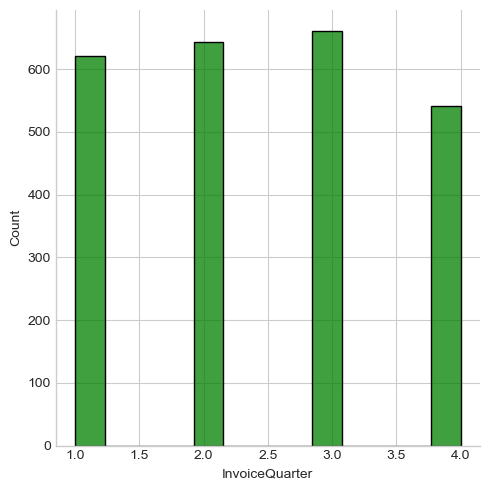

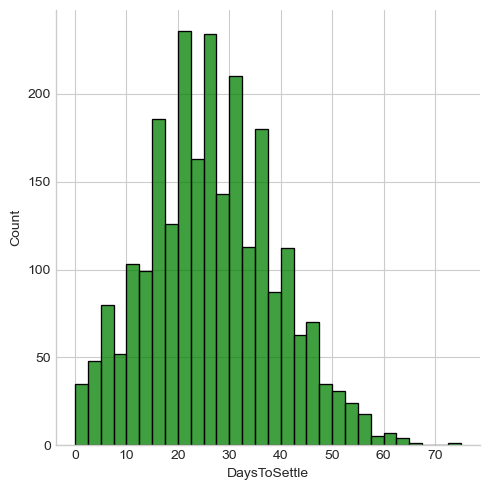

In [66]:
plt.figure(figsize=(8,8))
plt.figure(1)
sns.displot(df_receivable['InvoiceQuarter'],color='green')
plt.figure(figsize=(8,8))
plt.figure(2)
sns.displot(df_receivable['DaysToSettle'],color='green')
